In [1]:
import numpy as np
import pandas as pd

In [2]:
dfEmbeddings = pd.read_csv(
    'C:/Users/alire/OneDrive/data/statman_bitbucket/aki/LLM/March2024/openai_3large_operation.csv'
)
dfEmbeddings.head()

,project_id,operation_no,X1,X2,X3,X4,X5,X6,X7,X8,...,X3063,X3064,X3065,X3066,X3067,X3068,X3069,X3070,X3071,X3072
0,PR-00000001,1,0.011898,0.036309,-0.005463,0.008832,0.014760,0.027967,-0.035566,0.017884,...,-0.010715,0.010800,-0.012413,0.012261,0.008452,0.008917,0.010977,-0.029892,-0.010766,-0.010437
1,PR-00000002,2,0.000332,0.027386,-0.020735,-0.030093,0.011078,0.034497,-0.051592,-0.001025,...,-0.004109,0.002861,0.003123,-0.000474,0.001826,0.023946,0.022539,-0.020903,-0.003339,0.002045
2,PR-00000003,3,-0.013588,0.006824,-0.002654,0.027271,0.033145,0.019402,-0.031663,0.027783,...,0.004871,0.006225,-0.000025,0.002941,-0.011971,0.019294,0.002917,0.003523,0.004716,0.002019
3,PR-00000004,4,0.028444,0.027613,-0.017272,-0.006343,0.022245,0.052718,-0.014736,0.047054,...,0.011954,-0.006590,0.000384,-0.010179,0.002074,0.015004,0.001219,-0.010087,0.011813,0.037503
4,PR-00000005,5,0.015713,0.057943,-0.016102,0.009510,-0.026413,0.027086,-0.050581,0.033581,...,-0.001399,-0.003857,-0.012810,-0.008986,-0.001552,0.009922,0.005754,-0.013910,-0.013042,-0.006614


In [35]:
dims = [1000, 3072]
dim_names = ['X' + str(dim) for dim in dims]

X = dfEmbeddings[dim_names].to_numpy()
Xnorm = np.apply_along_axis(lambda x: x / np.sqrt(np.sum(x * x)), 1, X)

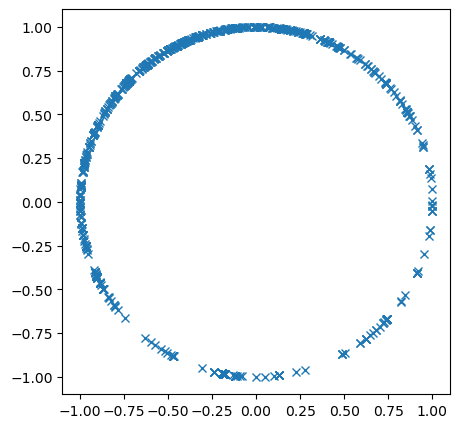

In [36]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(5, 5))

# Plot the first array
plt.plot(Xnorm[:, 0], Xnorm[:, 1], linestyle = "", marker='x')

# Add labels and title
#plt.xlabel('Without HPT')
#plt.ylabel('With HPT')
#plt.title('Training vs. Validation Cross-entropy Loss')

#plt.legend()

# Show the plot
plt.show()

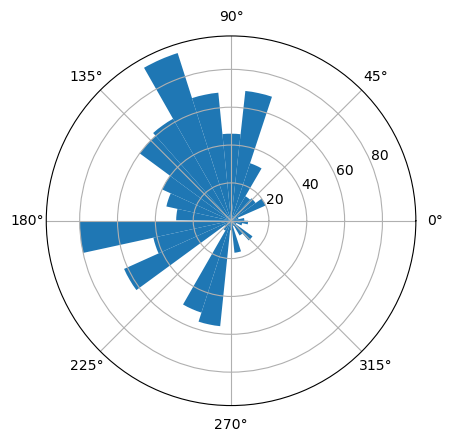

In [37]:
import math

angles = np.apply_along_axis(lambda x: math.atan2(x[1], x[0]), 1, Xnorm)

# Create a polar subplot
ax = plt.subplot(111, polar=True)

# Create the histogram
ax.hist(angles, bins=30)

# Display the plot
plt.show()

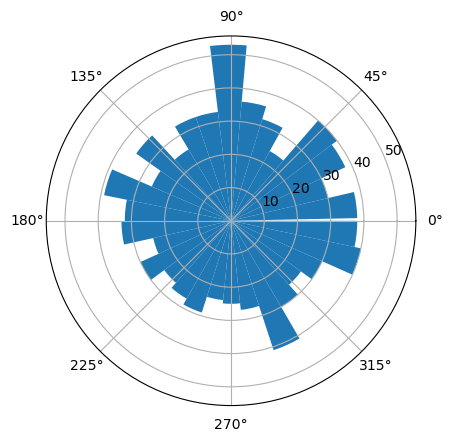

In [38]:
angles_ref = np.random.rand(Xnorm.shape[0]) * 2 * np.pi

# Create a polar subplot
ax = plt.subplot(111, polar=True)

# Create the histogram
ax.hist(angles_ref, bins=30)

# Display the plot
plt.show()